In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ------------------------------
# Generate synthetic nonlinear data
# ------------------------------
np.random.seed(42)
N = 100
X = np.linspace(-3, 3, N).reshape(-1, 1)
y_true = 0.5 * X**3 - X**2 + 2*X + 3
y = y_true + np.random.randn(N, 1) * 3.0  # add noise

In [3]:
# ------------------------------
# Feature Expansion for Polynomial Regression
# ------------------------------
def polynomial_features(X, degree):
    """
    Expands 1D input X into [x, x^2, ..., x^degree].
    """
    N = X.shape[0]
    poly_X = np.ones((N, degree))  # no bias term yet
    for d in range(1, degree+1):
        poly_X[:, d-1] = X[:,0]**d
    return poly_X

In [4]:
# ------------------------------
# Closed-form Linear Regression
# ------------------------------
def fit_ols(X, y):
    """
    Ordinary Least Squares closed-form solution.
    """
    X_design = np.hstack([np.ones((X.shape[0], 1)), X])  # add bias column
    beta_hat = np.linalg.inv(X_design.T @ X_design) @ (X_design.T @ y)
    return beta_hat

def predict(X, beta_hat):
    X_design = np.hstack([np.ones((X.shape[0], 1)), X])
    return X_design @ beta_hat

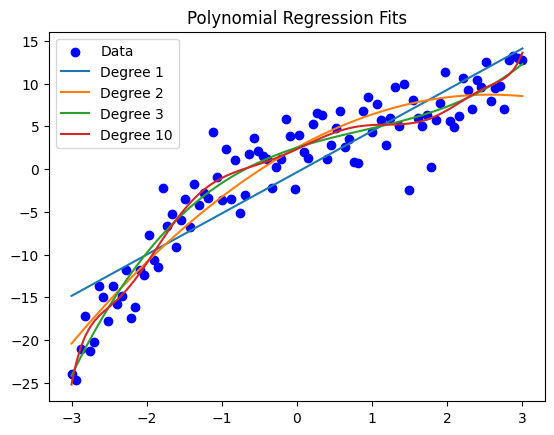

In [5]:
# ------------------------------
# Try Polynomial Regression
# ------------------------------
degrees = [1, 2, 3, 10]

plt.scatter(X, y, color="blue", label="Data")

for deg in degrees:
    X_poly = polynomial_features(X, deg)
    beta_hat = fit_ols(X_poly, y)
    y_pred = predict(X_poly, beta_hat)
    plt.plot(X, y_pred, label=f"Degree {deg}")

plt.legend()
plt.title("Polynomial Regression Fits")
plt.show()


In [6]:
# Something that I don't know